<a href="https://www.kaggle.com/code/jayloncombs/project?scriptVersionId=150370293" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/genius-song-lyrics-with-language-information/song_lyrics.csv


https://www.kaggle.com/datasets/carlosgdcj/genius-song-lyrics-with-language-information

This dataset originates from the website 'Genius' where lyrics to songs are posted as well as community-submitted explanations to the meanings behind those lyrics. The dataset has song titles, the full string of lyrics, and a few other columns. However, the column of note this dataset has is a `tag` field which stores which genre each song belongs to. (i.e. rap, pop, rock, etc.)

For my project, I would like to train an NLP AI to try to find a connection between lyrics and genre. I'd like to train it to classify the lyrics of a song into which genre they belong to. There is not necessarily any innate connection between these two concepts, which is why I especially want to see how the AI tackles this problem. Perhaps it will be able to find some connection that I am unable to see.

In [2]:
lyric_database = pd.read_csv("/kaggle/input/genius-song-lyrics-with-language-information/song_lyrics.csv")
lyric_database.sort_values(by="id")
lyric_database.head(20)

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",1,en,en,en
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",3,en,en,en
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...,4,en,en,en
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,5,en,en,en
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",6,en,en,en
5,Lollipop Remix,rap,Lil Wayne,2008,580832,"{""Kanye West"",""Static Major""}",[Intro: Lil Wayne]\nHaha\nUh-huh\nNo homo (You...,7,en,en,en
6,Im Not You,rap,Clipse,2002,28645,"{Jadakiss,""Styles P"",""Roscoe P. Coldchain""}","[Intro: Pusha T]\nNo, no, no!\nI told you, I l...",8,en,en,en
7,Family Ties,rap,Cam'ron,2004,41960,"{""Cam\\'ron"",""Lady Wray""}","[Verse 1: Cam'ron]\nKilla, Dipset\nMan I spit ...",9,en,en,en
8,Rockin and Rollin,rap,Cam'ron,1998,6399,"{""Cam\\'ron""}",[Verse 1]\nAy yo you wonder who I are\nI guzzl...,10,en,en,en
9,Lord You Know,rap,Cam'ron,2004,11882,"{""Cam\\'ron"",""Juelz Santana"",Jaheim}","[Chorus: Jaheim]\nNow Lord you know, just how ...",11,en,en,en


In this project our AI will predict one of the following outcomes given lyrics as an input:

In [3]:
print(lyric_database["tag"].unique())

['rap' 'rb' 'rock' 'pop' 'misc' 'country']


However, this dataset has a few problems that need to be addressed before using it for this project. Firstly, this dataset has lyrics from all different languages. For the purpose of this project, I'm going to limit the scope to just English songs. There may be a deeper correlation that can be made by using all languages, but for readability I chose to limit it to English. This can be easily done by filtering out songs using the `language` column restricting it to only 'en'.

Some of the data entries lack a tag or lack substantial lyrics which would break or confuse the AI so those will also be removed from the database. 

Additionally, the lyrics of a song on Genius are split up by verses and choruses and other musical notations separated from the lyrics with brackets. For example, a song can have the line `[Verse 1: Drake]`that follows before a verse sung by Drake. For the purposes of this project, those lines will remain in the lyrics. They aren't technically lyrics, but the AI can notice patterns with artists and verse/chorus/introduction setups to help classify which genre the song is in.

Finally, Genius allows users to upload lyrics for things that aren't songs as well such as scripts or poems. These are all tagged as 'misc,' but some songs are also tagged as misc. For the sake of simplicity, I will be culling all lyrics tagged as misc from the database even if they are songs, leaving just `rap`, `rb`, `rock`, `pop`, and `country` as the possible genre predictions.

In [4]:
db = (
    lyric_database
    .loc[lyric_database["language"] == "en"]
    .loc[lyric_database["tag"] != "misc"]
    .loc[lyric_database["tag"] != ""]
    .loc[lyric_database["tag"] != None]
    .loc[lyric_database["lyrics"] != None]
    .loc[lyric_database["lyrics"] != ""]
    .loc[lyric_database["lyrics"] != "[Instrumental]"] #some songs without lyrics will squeeze
                                                       #their way onto the website for no
                                                       # discernable reason
)
db = db.sort_values(by="id")

This dataset has several columns that can be used for all sorts of implementation. For the sake of this project only the `lyrics`, `tag`, and `id` columns are of interest to the AI, and `title` and `artist` help *us* read and understand the data.

`id` is how we iterate through each song, and `title` and `artist` is how we display the name of the song found by the id.

`lyrics` is our text input and `tag` is our classification output. We need these to train the AI.

The `language` column is extraneous now that we have filtered out any songs that are not in english.

In [5]:
columns_of_interest = ['id', 'title','artist', 'lyrics', 'tag']
db = db[columns_of_interest]
db.sort_values(by="id")
db.head()

,id,title,artist,lyrics,tag
0,1,Killa Cam,Cam'ron,"[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",rap
1,3,Can I Live,JAY-Z,"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",rap
2,4,Forgive Me Father,Fabolous,Maybe cause I'm eatin\nAnd these bastards fien...,rap
3,5,Down and Out,Cam'ron,[Produced by Kanye West and Brian Miller]\n\n[...,rap
4,6,Fly In,Lil Wayne,"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",rap


Once we've culled all unnecessary data and extraneous columns from the database we are left with a cleaned up set of data to feed to the AI model. However, there are still foreign symbols and other quirks present in the data that will confuse the AI. 

Most notably, each of the string values has many many `\n`s signifying new lines in the lyrics page. We want to keep these new-line symbols for the AI to learn from, but they are not separated by spaces and the AI will consider anything not separated by spaces as one word. Consider this song for example:

In [6]:
print(db.loc[db["id"] == 154314].values)

[[154314 'Do I Wanna Know?' 'Arctic Monkeys'
  "[Verse 1]\nHave you got colour in your cheeks?\nDo you ever get that fear that you can't shift the type\nThat sticks around like summat in your teeth?\nAre there some aces up your sleeve?\nHave you no idea that you're in deep?\nI've dreamt about you nearly every night this week\nHow many secrets can you keep?\n'Cause there's this tune I found\nThat makes me think of you somehow an' I play it on repeat\nUntil I fall asleep, spillin' drinks on my settee\n\n[Pre-Chorus]\n(Do I wanna know?) If this feelin' flows both ways?\n(Sad to see you go) Was sorta hopin' that you'd stay\n(Baby, we both know) That the nights were mainly made\nFor sayin' things that you can't say tomorrow day\n\n[Chorus]\nCrawlin' back to you\nEver thought of callin' when\nYou've had a few?\n'Cause I always do\nMaybe I'm too\nBusy bein' yours\nTo fall for somebody new\nNow, I've thought it through\nCrawlin' back to you\n[Verse 2]\nSo have you got the guts?\nBeen wonderin'

In this example you can see there are many pieces of the string that are *supposed* to be separate lines, but because of the special character \n being present and not being buffered by spaces words like "`settee\n\n[Pre-Chorus]\n(Do`" are made. This will completely butcher a one-hot matrix and confuse our AI. To fix this, we can separate `\n` by whitespaces to separate it from the rest of the words. 

By just doing this we would separate our word example into "`settee \n \n [Pre-Chorus] \n (Do`." This still leaves words like "`(Do`" and "`[Verse`" present in our example. To solve this, boundary symbols like parentheses and brackets need to be separated by spaces too. By implementing this fix we can keep the musical notation and line separation for the AI to learn from without breaking the AI completely.

To do this adjustement we will be using a regular expression library `re`. Here is what our lyrics will look like after we split these character up with whitespace:

In [7]:
import re
lyrics = db.loc[db["id"] == 154314].values[0][3]

parts = re.split(r"([\n\[\]\(\)])", lyrics)
#print(repr(parts))

whitespace_lyrics = " ".join(filter(None, parts))
print(repr(whitespace_lyrics))

"[ Verse 1 ] \n Have you got colour in your cheeks? \n Do you ever get that fear that you can't shift the type \n That sticks around like summat in your teeth? \n Are there some aces up your sleeve? \n Have you no idea that you're in deep? \n I've dreamt about you nearly every night this week \n How many secrets can you keep? \n 'Cause there's this tune I found \n That makes me think of you somehow an' I play it on repeat \n Until I fall asleep, spillin' drinks on my settee \n \n [ Pre-Chorus ] \n ( Do I wanna know? )  If this feelin' flows both ways? \n ( Sad to see you go )  Was sorta hopin' that you'd stay \n ( Baby, we both know )  That the nights were mainly made \n For sayin' things that you can't say tomorrow day \n \n [ Chorus ] \n Crawlin' back to you \n Ever thought of callin' when \n You've had a few? \n 'Cause I always do \n Maybe I'm too \n Busy bein' yours \n To fall for somebody new \n Now, I've thought it through \n Crawlin' back to you \n [ Verse 2 ] \n So have you got

Much better! Now you can see our original problem "word" of "`settee\n\n[Pre-Chorus]\n(Do`" has been properly split into "`sette \n \n [ Pre-Chorus ] ( Do`". Our data still is not perfect, as you can see there are puncuation symbols like `?` and `,`  and any punctuated word will be considered a separate entry by the AI. So `Know` and `Know?` and `Know,` are all considered unique words. This can be solved by removing the punctuation from our lyrics using `re`. 

In [8]:
unpunctuated = re.sub(r"([?.,!:;])",'',whitespace_lyrics)
print(repr(unpunctuated))

"[ Verse 1 ] \n Have you got colour in your cheeks \n Do you ever get that fear that you can't shift the type \n That sticks around like summat in your teeth \n Are there some aces up your sleeve \n Have you no idea that you're in deep \n I've dreamt about you nearly every night this week \n How many secrets can you keep \n 'Cause there's this tune I found \n That makes me think of you somehow an' I play it on repeat \n Until I fall asleep spillin' drinks on my settee \n \n [ Pre-Chorus ] \n ( Do I wanna know )  If this feelin' flows both ways \n ( Sad to see you go )  Was sorta hopin' that you'd stay \n ( Baby we both know )  That the nights were mainly made \n For sayin' things that you can't say tomorrow day \n \n [ Chorus ] \n Crawlin' back to you \n Ever thought of callin' when \n You've had a few \n 'Cause I always do \n Maybe I'm too \n Busy bein' yours \n To fall for somebody new \n Now I've thought it through \n Crawlin' back to you \n [ Verse 2 ] \n So have you got the guts \

Finally, to get our data the most AI friendly we should fix slang, and regulate capital letters. This gives our AI the highest chance of success and also allows us to more accurately analyze our dataset.

Some slang we can't fix or predict, but words that end in an apostrophe can be replaced with a 'g', like `Crawlin'` to `Crawling` in our example above. Additionally, `'Cause` can be changed to `Because`. That should affect a significant amount of songs, but it will be impossible to account for all slang. This is good enough for our purposes.

To remove capital letters we can just use python's built in `.lower()` method. Very simple.

In [9]:
final_lyrics = re.sub(r"in'(?= \w|\.|,|$)","ing",unpunctuated.lower())

print(repr(final_lyrics))

"[ verse 1 ] \n have you got colour in your cheeks \n do you ever get that fear that you can't shift the type \n that sticks around like summat in your teeth \n are there some aces up your sleeve \n have you no idea that you're in deep \n i've dreamt about you nearly every night this week \n how many secrets can you keep \n 'cause there's this tune i found \n that makes me think of you somehow an' i play it on repeat \n until i fall asleep spilling drinks on my settee \n \n [ pre-chorus ] \n ( do i wanna know )  if this feeling flows both ways \n ( sad to see you go )  was sorta hoping that you'd stay \n ( baby we both know )  that the nights were mainly made \n for saying things that you can't say tomorrow day \n \n [ chorus ] \n crawling back to you \n ever thought of calling when \n you've had a few \n 'cause i always do \n maybe i'm too \n busy being yours \n to fall for somebody new \n now i've thought it through \n crawling back to you \n [ verse 2 ] \n so have you got the guts \

Now that our data is ready to be cleaned up and AI ready, let's see some analytical metrics to help us wrap our head around what our AI is working with. Our database is currently quite large clocking in at over 3 million songs after misc and empty entries were removed, so for exploratory analysis we will be cutting our database down to 5% of its original size and applying our edits to that subset.

In [10]:
def fix_lyrics(lyrics):
    parts = re.split(r"([\n\[\]\(\)])", lyrics)
    output = " ".join(filter(None, parts))
    output = re.sub(r"([?.,!:;])",'',output)
    output = re.sub(r"in'(?= \w|\.|,|$)","ing",output.lower())
    return output

print(f"original database:{len(db)} songs")
subset = db.sample(frac=0.05)
print(f"subset:{len(subset)} songs")

subset["lyrics"] = subset["lyrics"].apply(fix_lyrics)
subset = subset.sort_values(by="id")
subset.head(20)

original database:3233212 songs
subset:161661 songs


,id,title,artist,lyrics,tag
95,86,All Falls Down,Kanye West,[ chorus syleena johnson & kanye west ] \n oh ...,rap
109,100,Thank You,JAY-Z,[ intro ] \n thank you thank you very much for...,rap
130,135,Real As It Gets,JAY-Z,[ intro jeezy ] \n yeah see it's that \n it's ...,rap
181,181,Hard Knock Life Ghetto Anthem,JAY-Z,[ produced by mark the 45 king ] \n \n [ intro...,rap
187,188,Georgia... Bush / Weezyz Ambitionz,Lil Wayne,[ part 1 georgia bush produced by vudu spellz ...,rap
208,209,Popular Demand Popeyes,Clipse,[ chorus pharrell williams ] \n uh mami you mi...,rap
227,222,Dumb Out,Joe Budden,[ verse 1 ] \n stuck between platinum and flop...,rap
247,237,It Was a Good Day,Ice Cube,[ produced by dj pooh ] \n \n [ intro ] \n bre...,rap
249,239,The Nigga Ya Love to Hate,Ice Cube,[ verse 1 ice cube ] \n i heard payback's a mo...,rap
289,274,Coming of Age,JAY-Z,[ intro jay-z ] \n yeah \n come experience lif...,rap


Taking 5% of our database leaves us with 646,000 songs which is still a substantial amount of data. Now that we have a smaller dataset, let's take a look at some metrics. The metrics of our subset should theorhetically be similar to metrics of our entire dataset since this is a selection of random songs from the larger dataset.

Firstly, let's see a plot of how many words appear in our dataset to get an idea of how long our inputs to the AI are going to be. We can show this with a histogram.

<Axes: >

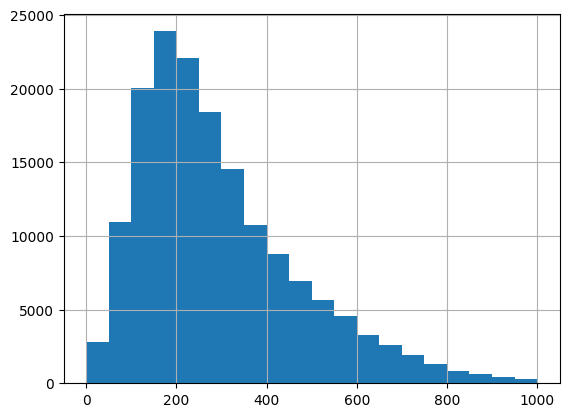

In [11]:
subset['lyrics'].str.split().map(lambda x: len(x)).hist(range=[0, 1000],bins=20)

Next, let's see the most common word that appears in our data. Likely this is going to be "`\n`" as it is the 'word' that separates lines in the lyrics, so we will be excluding these in our search. Symbols like brackets and parentheses are also likely to be common with the way we split it up in the previous cells, so we will also be ignoring those. Stop words are also bound to be extremely common, so we will be defining a list of common stop words to ignore. Finally we don't want to see instances of musical notations like `verse` and `chorus` if we want to get an accurate idea of the words our AI will be paying attention to.

In [12]:
from collections import Counter
import nltk

stopwords = nltk.corpus.stopwords.words('english')
stopwords += (['[', ']', '(', ')', '`', 'verse', 'chorus', 'intro', 'outro','like','i\'m'])

words = subset['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
print(words)
#top_words.plot.bar(rot=0, figsize=(16,10), width=0.8)
#print(Counter(" ".join(subset["lyrics"]).split()).most_common(50))

95         syleena johnson & kanye west oh falls yeah rea...
109        thank thank much coming evening refrain thank ...
130        jeezy yeah see blueprint 3 shit right tm 103 s...
181        produced mark 45 king take bass line uh-huh ji...
187        part 1 georgia bush produced vudu spellz lil w...
                                 ...                        
5134576    remember 18 listening mac miller beats oh youn...
5134588    ride northern sky free eagle flying high acros...
5134709    1 feet grazing sole dead bodies vogue drift fl...
5134769    1 told evening april yet thought taken single ...
5134814    said sweet enough take breath away smart enoug...
Name: lyrics, Length: 161661, dtype: object


In [13]:
top_words = pd.DataFrame(Counter(" ".join(words).split()).most_common(20),
                    columns=['Word', 'Frequency']).set_index('Word')
top_words.head(20)

,Frequency
Word,
know,273002
got,220202
get,198061
yeah,197596
love,197136
go,153758
oh,140178
see,139003
time,137370


It's interesting to see how high love is at the top of the list of words. A lot of songs are about love, whether it be for a person or any other thing worth being passionate about. Action words like "go" and "get" and "got" are also very high on the list which makes sense especially since a lot of rap songs are about wealth and possession. I'm also surprised to see that the stop word "I'm" was so common that it even made a re-appearance with the incorrect symbol as the apostrophe. If there was any doubt these are community submitted lyrics, it's certainly been squashed. 